In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Download data

In [77]:
interactions = pd.read_csv('/Users/dan/Desktop/Python/Project 1yMOVS/Data/interactions.csv', sep=',')

In [78]:
items = pd.read_csv('/Users/dan/Desktop/Python/Project 1yMOVS/Data/items.csv', sep=',')

In [79]:
users = pd.read_csv('/Users/dan/Desktop/Python/Project 1yMOVS/Data/users.csv', sep=',')

# users

In [80]:
users.head()

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,М,1
1,962099,age_18_24,income_20_40,М,0
2,1047345,age_45_54,income_40_60,Ж,0
3,721985,age_45_54,income_20_40,Ж,0
4,704055,age_35_44,income_60_90,Ж,0


In [81]:
# Все ли пользователи уникальные (есть ли дубли)
len(users) == users['user_id'].nunique()

True

___AGE___

In [107]:
man_age = users[users['sex']=='М'].groupby('age')['user_id'].count().reset_index().rename(columns={'user_id':'cnt'})
wooman_age = users[users['sex']!='М'].groupby('age')['user_id'].count().reset_index().rename(columns={'user_id':'cnt'})
total_age = users.groupby('age')['user_id'].count().reset_index().rename(columns={'user_id':'cnt'})

man_age

,age,cnt
0,age_18_24,46023
1,age_25_34,108350
2,age_35_44,110376
3,age_45_54,74627
4,age_55_64,38576
5,age_65_inf,19994


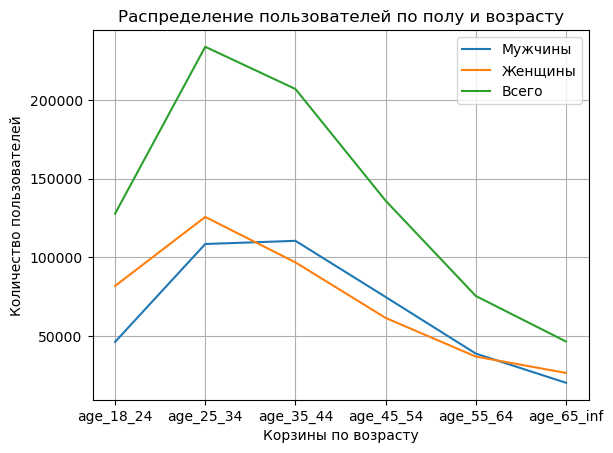

In [108]:
plt.plot(man_age['age'], man_age['cnt'])
plt.plot(wooman_age['age'], wooman_age['cnt'])
plt.plot(total_age['age'], total_age['cnt'])

plt.title('Распределение пользователей по полу и возрасту')
plt.ylabel('Количество пользователей')
plt.xlabel('Корзины по возрасту')

plt.legend(['Мужчины', 'Женщины', 'Всего'])

plt.grid()

plt.show()

Заметим, что больше всего пользователей сервиса у нас в возрасте 25-34 года (25-44)

Если детализировать по полу - девушек в возрасте 18-24 года значительно больше, чем парней. Но с ростом возрастной корзины разница сначала уменьшается, а затем наоборот - мужчина становиться больше.

___Age & Income___

In [109]:
df_gr = pd.DataFrame(users.groupby(['age', 'income'])['user_id'].count()).reset_index()

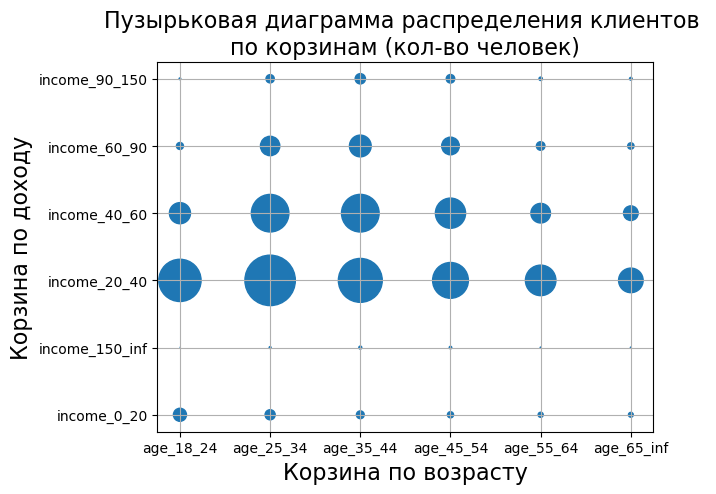

In [110]:
fig, ax = plt.subplots()
ax.scatter(df_gr['age'], df_gr['income'], s = df_gr['user_id']/100) # user_id -> cnt clients

plt.xlabel('Корзина по возрасту', fontsize=16)
plt.ylabel('Корзина по доходу', fontsize=16)
plt.title('Пузырьковая диаграмма распределения клиентов \nпо корзинам (кол-во человек)', fontsize=16)

ax.grid(True)
#fig.tight_layout()

plt.show()

___kids___

In [115]:
age_kids = users.groupby('age')['kids_flg'].mean().reset_index()
age_kids['kids_flg'] = age_kids['kids_flg']*100
age_kids

,age,kids_flg
0,age_18_24,16.829845
1,age_25_34,29.696571
2,age_35_44,49.433693
3,age_45_54,33.600883
4,age_55_64,12.446688
5,age_65_inf,9.738281


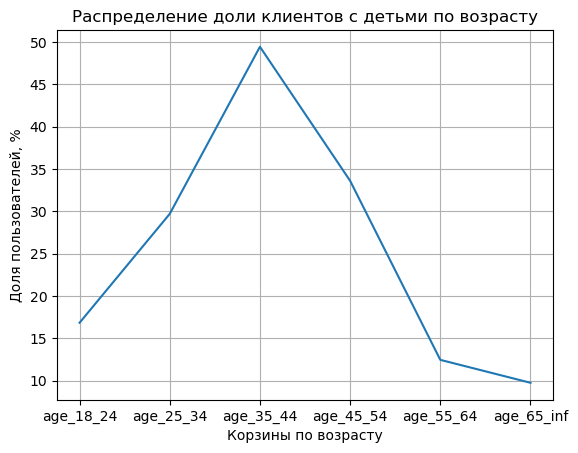

In [117]:
plt.plot(age_kids['age'], age_kids['kids_flg'])

plt.title('Распределение доли клиентов с детьми по возрасту')
plt.ylabel('Доля пользователей, %')
plt.xlabel('Корзины по возрасту')

plt.grid()

plt.show()

In [121]:
income_kids = users.groupby('income')['kids_flg'].mean().reset_index()
income_kids['kids_flg'] = income_kids['kids_flg']*100
income_kids

,income,kids_flg
0,income_0_20,23.937534
1,income_150_inf,33.333333
2,income_20_40,26.826066
3,income_40_60,34.874159
4,income_60_90,41.544107
5,income_90_150,41.322846


# interactions

In [128]:
interactions

,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250,72.0
1,699317,1659,2021-05-29,8317,100.0
2,656683,7107,2021-05-09,10,0.0
3,864613,7638,2021-07-05,14483,100.0
4,964868,9506,2021-04-30,6725,100.0
...,...,...,...,...,...
5476246,648596,12225,2021-08-13,76,0.0
5476247,546862,9673,2021-04-13,2308,49.0
5476248,697262,15297,2021-08-20,18307,63.0
5476249,384202,16197,2021-04-19,6203,100.0


In [132]:
# users + interactions, только с пересечением
usr_int = users.merge(interactions, how='inner', on='user_id')

usr_int

,user_id,age,income,sex,kids_flg,item_id,last_watch_dt,total_dur,watched_pct
0,973171,age_25_34,income_60_90,М,1,12204,2021-04-25,7361,100.0
1,973171,age_25_34,income_60_90,М,1,5471,2021-05-06,91345,16.0
2,973171,age_25_34,income_60_90,М,1,218,2021-05-08,160564,89.0
3,973171,age_25_34,income_60_90,М,1,5695,2021-04-25,6520,100.0
4,973171,age_25_34,income_60_90,М,1,13865,2021-06-11,9,0.0
...,...,...,...,...,...,...,...,...,...
4424472,393868,age_25_34,income_20_40,М,0,9164,2021-07-22,719,13.0
4424473,339025,age_65_inf,income_0_20,Ж,0,973,2021-08-08,36,1.0
4424474,251008,NaN,NaN,NaN,0,14452,2021-08-11,18,0.0
4424475,251008,NaN,NaN,NaN,0,4463,2021-08-11,7,0.0


___sex & last_watch_dt___

In [142]:
interactions_group = usr_int.groupby('last_watch_dt')['user_id'].count().reset_index().rename(columns={'user_id':'ttl'})
man_lw = usr_int[usr_int['sex']=='М'].groupby('last_watch_dt')['user_id'].count().reset_index().rename(columns={'user_id':'man'})
woman_lw = usr_int[usr_int['sex']!='М'].groupby('last_watch_dt')['user_id'].count().reset_index().rename(columns={'user_id':'wman'})

In [143]:
total_lw = interactions_group.merge(man_lw, how='inner', on='last_watch_dt')
total_lw = total_lw.merge(woman_lw, how='inner', on='last_watch_dt')

In [144]:
del interactions_group
del man_lw
del woman_lw

In [145]:
total_lw.head()

,last_watch_dt,ttl,man,wman
0,2021-03-13,13746,7477,6269
1,2021-03-14,13449,7493,5956
2,2021-03-15,10723,6000,4723
3,2021-03-16,11110,6195,4915
4,2021-03-17,11152,6160,4992


Первый день в выборке 2021-03-13
Последний день в выборке 2021-08-22


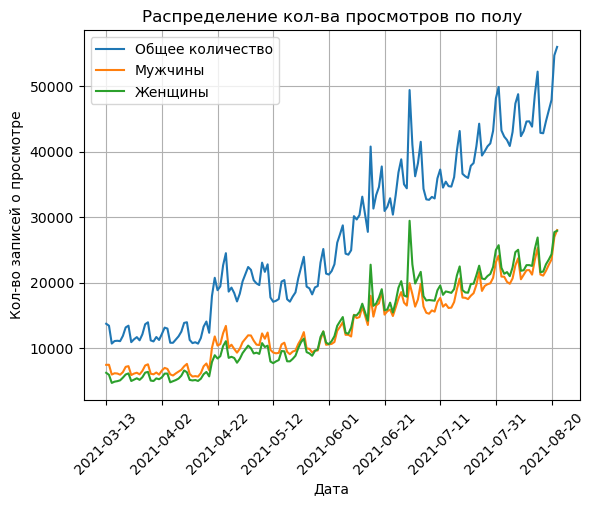

In [150]:
print(f'Первый день в выборке {total_lw["last_watch_dt"].min()}')
print(f'Последний день в выборке {total_lw["last_watch_dt"].max()}')


plt.plot(total_lw.last_watch_dt, total_lw.ttl)

plt.plot(total_lw.last_watch_dt, total_lw.man)

plt.plot(total_lw.last_watch_dt, total_lw.wman)

step = 20  # Устанавливаем шаг между подписями
plt.xticks(range(0, len(total_lw.ttl), step), total_lw.last_watch_dt[::step], rotation=45)  # Где x_values - ваши значения на оси X

plt.title('Распределение кол-ва просмотров по полу')
plt.ylabel('Кол-во записей о просмотре')
plt.xlabel('Дата')

plt.legend(['Общее количество', 'Мужчины', 'Женщины'])

plt.grid()

plt.show()

Во временном ряде заметен тренд и некоторая А цикличность, стоит отметить что число просмотров растет, женщины чаще просматривают контент, но различия не большие

___sex & total_dur___

In [190]:
total_dur_group = usr_int.groupby('total_dur')['user_id'].count().reset_index().rename(columns={'user_id':'ttl'})
man_lw = usr_int[usr_int['sex']=='М'].groupby('total_dur')['user_id'].count().reset_index().rename(columns={'user_id':'man'})
woman_lw = usr_int[usr_int['sex']!='М'].groupby('total_dur')['user_id'].count().reset_index().rename(columns={'user_id':'wman'})

In [191]:
bins = [0, 10000, 20000, 30000, 40000, 50000, 75000, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 100000000]
labels = ['0-10к', '10к-20к', '20к-30к', '30к-40к', '40к-50к', '50к-75к','75к-100к','100к-200к','200к-300к','300к-400к'
          ,'400к-500к','500к-750к','750к-1кк','1кк-100кк']

In [192]:
total_dur_group['total_dur_cut'] = pd.cut(total_dur_group['total_dur'], bins=bins, labels=labels, include_lowest=True)
total_dur_group['sec_duratin'] = total_dur_group['ttl']*total_dur_group['total_dur']
total_dur_group = total_dur_group.groupby('total_dur_cut')['sec_duratin'].sum().reset_index().rename(columns={'sec_duratin':'ttl'})

man_lw['total_dur_cut'] = pd.cut(man_lw['total_dur'], bins=bins, labels=labels, include_lowest=True)
man_lw['sec_duratin'] = man_lw['man']*man_lw['total_dur']
man_lw = man_lw.groupby('total_dur_cut')['sec_duratin'].sum().reset_index().rename(columns={'sec_duratin':'man'})

woman_lw['total_dur_cut'] = pd.cut(woman_lw['total_dur'], bins=bins, labels=labels, include_lowest=True)
woman_lw['sec_duratin'] = woman_lw['wman']*woman_lw['total_dur']
woman_lw = woman_lw.groupby('total_dur_cut')['sec_duratin'].sum().reset_index().rename(columns={'sec_duratin':'wman'})

woman_lw

/tmp/ipykernel_83480/4254913818.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_dur_group = total_dur_group.groupby('total_dur_cut')['sec_duratin'].sum().reset_index().rename(columns={'sec_duratin':'ttl'})
/tmp/ipykernel_83480/4254913818.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  man_lw = man_lw.groupby('total_dur_cut')['sec_duratin'].sum().reset_index().rename(columns={'sec_duratin':'man'})
/tmp/ipykernel_83480/4254913818.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavio

,total_dur_cut,wman
0,0-10к,5598079942
1,10к-20к,2056809100
2,20к-30к,1499396846
3,30к-40к,1448510449
4,40к-50к,1002647807
5,50к-75к,1471905297
6,75к-100к,1106897087
7,100к-200к,1613532040
8,200к-300к,746622527
9,300к-400к,491339950


In [193]:
total_td = total_dur_group.merge(man_lw, how='inner', on='total_dur_cut')
total_td = total_td.merge(woman_lw, how='inner', on='total_dur_cut')
total_td

,total_dur_cut,ttl,man,wman
0,0-10к,11301822973,5703743031,5598079942
1,10к-20к,3840717680,1783908580,2056809100
2,20к-30к,2459336916,959940070,1499396846
3,30к-40к,2415092875,966582426,1448510449
4,40к-50к,1741082767,738434960,1002647807
5,50к-75к,2498633471,1026728174,1471905297
6,75к-100к,1908347534,801450447,1106897087
7,100к-200к,2748958836,1135426796,1613532040
8,200к-300к,1259904167,513281640,746622527
9,300к-400к,803023392,311683442,491339950


In [195]:
from matplotlib.pyplot import figure

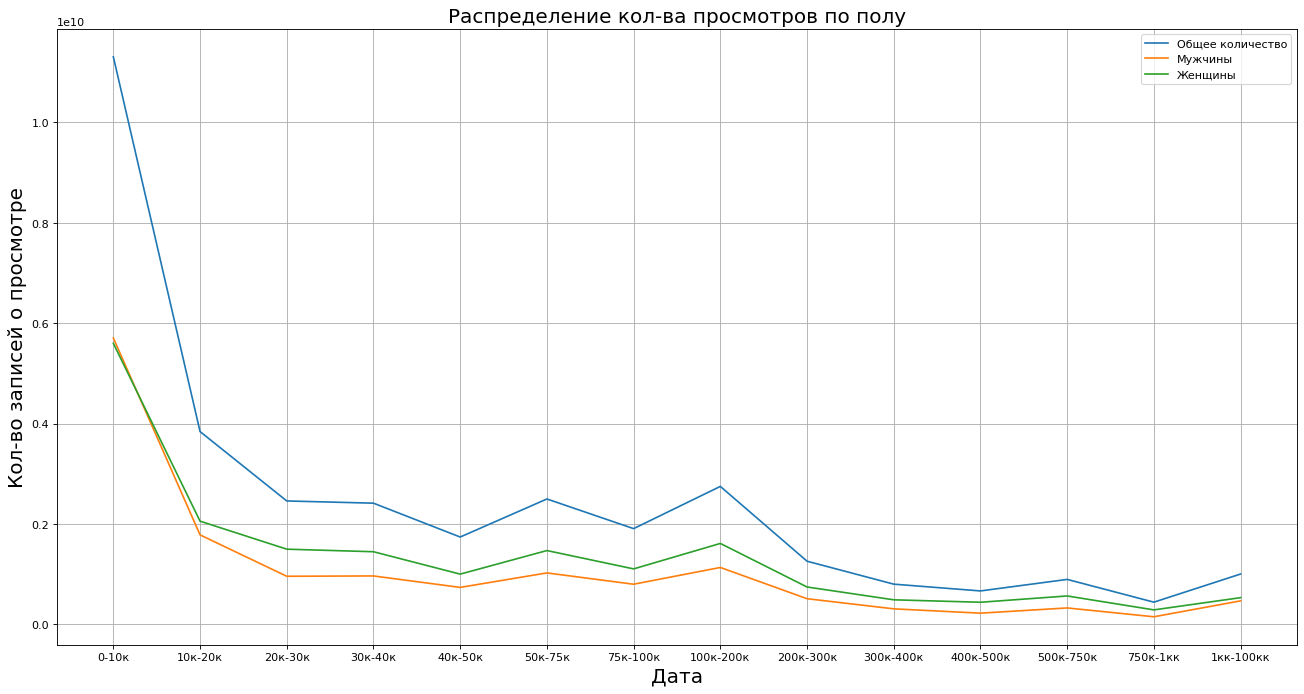

In [200]:
figure(figsize=(20, 10), dpi=80)

plt.plot(total_td.total_dur_cut, total_td.ttl)

plt.plot(total_td.total_dur_cut, total_td.man)

plt.plot(total_td.total_dur_cut, total_td.wman)

#step = 20  # Устанавливаем шаг между подписями
#plt.xticks(range(0, len(total_lw.ttl), step), total_lw.last_watch_dt[::step], rotation=45)  # Где x_values - ваши значения на оси X

plt.title('Распределение длительности просмотров по полу', fontsize=18)
plt.ylabel('Кол-во просмотренных секунд', fontsize=18)
plt.xlabel('Дата', fontsize=18)

plt.legend(['Общее количество', 'Мужчины', 'Женщины'])

plt.grid()

plt.show()

___item_id___

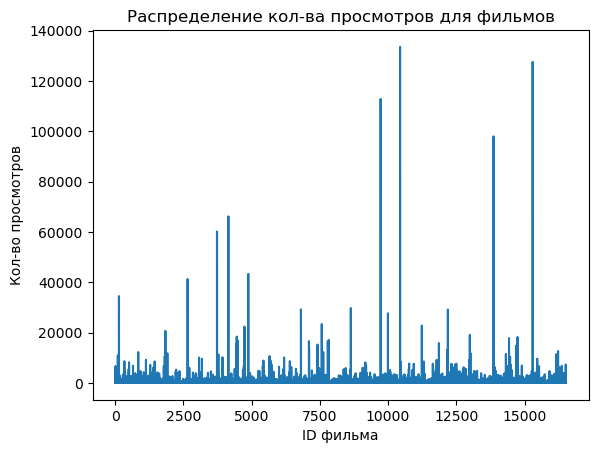

In [207]:
plt.plot(usr_int.groupby('item_id')['user_id'].count())

plt.title('Распределение кол-ва просмотров для фильмов')
plt.ylabel('Кол-во просмотров')
plt.xlabel('ID фильма')

plt.show()

In [213]:
t = usr_int.groupby('item_id')['user_id'].count()
t.sort_values(ascending=False).head(10)

item_id
10440    133553
15297    127620
9728     112894
13865     97995
4151      66206
3734      60214
4880      43337
2657      41307
142       34501
8636      29773
Name: user_id, dtype: int64

Самый популярынй фильм смотрели 133,5 тыс раз

___watched_pct___

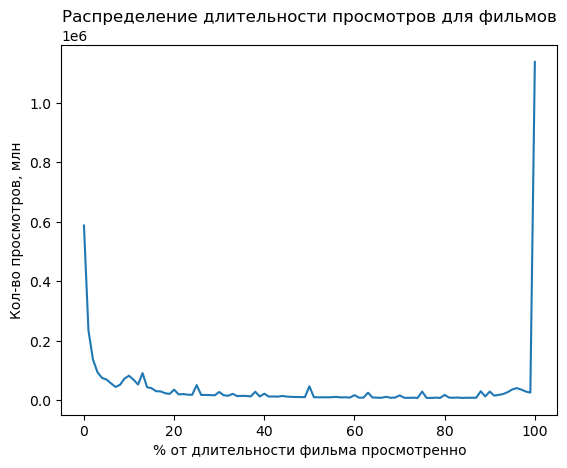

In [218]:
plt.plot(usr_int.groupby('watched_pct')['user_id'].count())

plt.title('Распределение длительности просмотров для фильмов')
plt.ylabel('Кол-во просмотров, млн')
plt.xlabel('% от длительности фильма просмотренно')

plt.show()

Видно, что если пользователь просмотрел 10 минут от фильма - то он с высокой вероятностью останется его досматривать

___films for men or wooman only___

In [249]:
plt_df = usr_int.groupby(['item_id', 'sex'])['user_id'].count().reset_index().rename(columns={'user_id':'count'})

plt_df_w = plt_df[plt_df['sex']=='Ж'].drop('sex', axis=1).rename(columns={'count':'count_w'})
plt_df_m = plt_df[plt_df['sex']=='М'].drop('sex', axis=1).rename(columns={'count':'count_m'})

plt_df_c1 = plt_df_w.merge(plt_df_m, how='left', on='item_id') 
plt_df_c2 = plt_df_m.merge(plt_df_w, how='left', on='item_id') # Если отвалятся фильмы где женщины не смотрели

plt_df = pd.concat([plt_df_c1, plt_df_c2]).drop_duplicates().reset_index(drop=True)

plt_df = plt_df.fillna(0)
plt_df['diff_w-m'] = plt_df['count_w'] - plt_df['count_m']

plt_df = plt_df.groupby('diff_w-m')['item_id'].count().reset_index()

plt_df

,diff_w-m,item_id
0,-18532.0,1
1,-15952.0,1
2,-6903.0,1
3,-5717.0,1
4,-4961.0,1
...,...,...
870,4672.0,1
871,6541.0,1
872,9614.0,1
873,13347.0,1


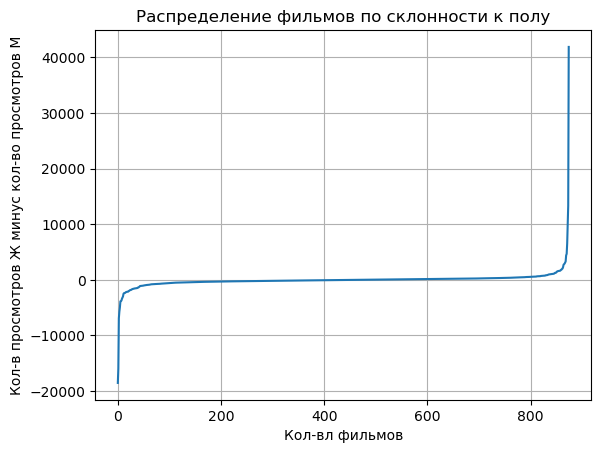

In [257]:
plt.plot(plt_df[plt_df['diff_w-m']!=0]['diff_w-m'])

plt.title('Распределение фильмов по склонности к полу')
plt.ylabel('Кол-в просмотров Ж минус кол-во просмотров М')
plt.xlabel('Кол-вл фильмов')

plt.grid()

Тут смотрим следующие - для каждого фильма считаем разницу "Кол-во раз просмотрено девушкой" минус "Кол-во раз просмотрено мужчиной"
Эта метрика по оси Y

По оси X - кол-во фильмов для каждой из разниц, например у нас практически нет фильмов, которые смотрели бы мужчины в подавляющем кол-ве, но наоборот есть фильмы, которые смотрят женщины.

Чаще всего наблюдается полное равенство (исключено из графика) или "небольшая разница" - это синяя линия вдоль оси Х

# items

In [296]:
items.head()

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,10711,film,Поговори с ней,Hable con ella,2002.0,"драмы, зарубежные, детективы, мелодрамы",Испания,NaN,16.0,NaN,Педро Альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ..."
1,2508,film,Голые перцы,Search Party,2014.0,"зарубежные, приключения, комедии",США,NaN,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
2,10716,film,Тактическая сила,Tactical Force,2011.0,"криминал, зарубежные, триллеры, боевики, комедии",Канада,NaN,16.0,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг..."
3,7868,film,45 лет,45 Years,2015.0,"драмы, зарубежные, мелодрамы",Великобритания,NaN,16.0,NaN,Эндрю Хэй,"Александра Риддлстон-Барретт, Джеральдин Джейм...","Шарлотта Рэмплинг, Том Кортни, Джеральдин Джей...","45, лет, 2015, Великобритания, брак, жизнь, лю..."
4,16268,film,Все решает мгновение,NaN,1978.0,"драмы, спорт, советские, мелодрамы",СССР,NaN,12.0,Ленфильм,Виктор Садовский,"Александр Абдулов, Александр Демьяненко, Алекс...",Расчетливая чаровница из советского кинохита «...,"Все, решает, мгновение, 1978, СССР, сильные, ж..."


___film or series___

In [270]:
items.groupby('content_type')['item_id'].count().reset_index()

,content_type,item_id
0,film,12002
1,series,3961


___genres___

In [275]:
genres = items['genres'].apply(lambda x: x.split(','))
list_genres = list()

for row in genres:
    list_genres += row

In [290]:
t = pd.DataFrame({
    'films' : list_genres,
})

t['count'] = 1

df_genres = t.groupby(list_genres)['count'].count().reset_index()
df_genres.sort_values('count', ascending=False).head(15)

,index,count
99,драмы,4635
26,комедии,3273
20,зарубежные,2498
68,триллеры,2231
34,мелодрамы,2018
53,приключения,1636
87,боевики,1381
135,русские,1251
10,детективы,1052
101,зарубежные,1005


___release_year___

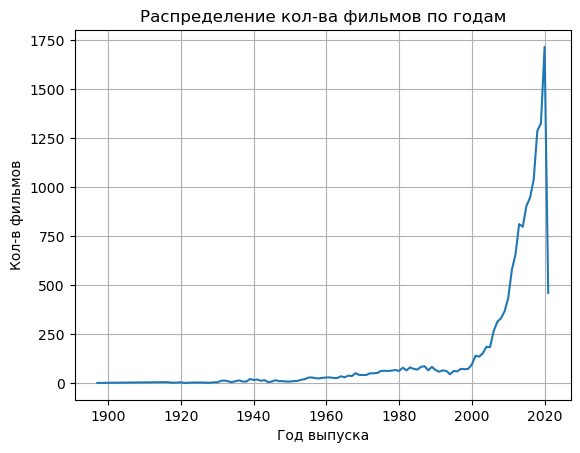

In [295]:
plt.plot(items.groupby('release_year')['item_id'].count())

plt.title('Распределение кол-ва фильмов по годам')
plt.ylabel('Кол-в фильмов')
plt.xlabel('Год выпуска')

plt.grid()